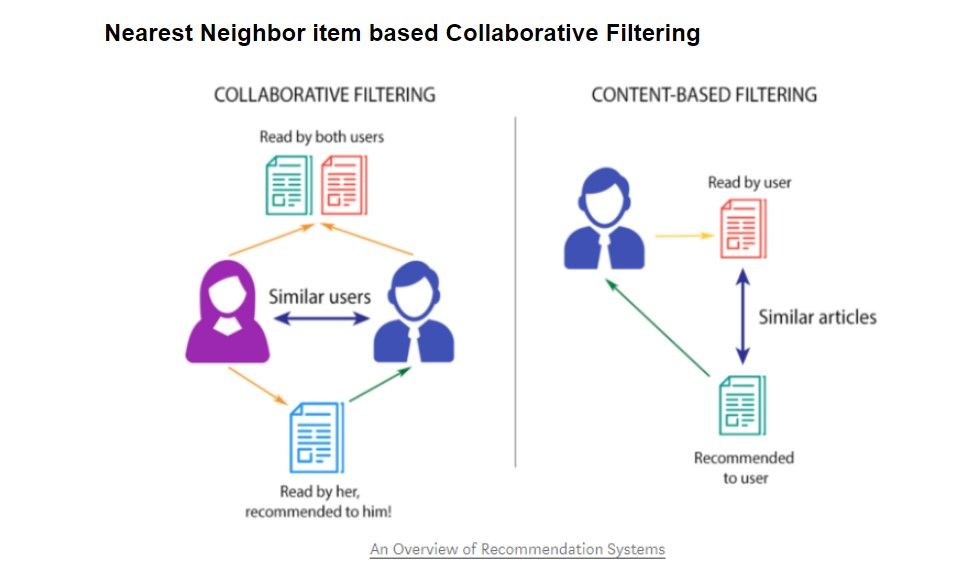

In [1]:
import numpy as np
import pandas as pd

In [2]:
## Dataset url: https://grouplens.org/datasets/movielens/latest/

movies_df = pd.read_csv('datasets/movies.csv', usecols=['movieId', 'title'], dtype={'movieId' : 'int32', 'title' : 'str'})

rating_df = pd.read_csv('datasets/ratings.csv', usecols=['userId', 'movieId', 'rating'],
                       dtype={'userId':'int32', 'movieId':'int32', 'rating':'float32'})

In [3]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int32 
 1   title    9742 non-null   object
dtypes: int32(1), object(1)
memory usage: 114.3+ KB


In [4]:
movies_df.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [5]:
# Check the null value
movies_df.isnull().sum()

movieId    0
title      0
dtype: int64

In [6]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int32  
 1   movieId  100836 non-null  int32  
 2   rating   100836 non-null  float32
dtypes: float32(1), int32(2)
memory usage: 1.2 MB


In [7]:
rating_df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [8]:
# Check the null value
rating_df.isna().sum()

userId     0
movieId    0
rating     0
dtype: int64

In [9]:
# Check the shape
movies_df.shape

(9742, 2)

In [10]:
rating_df.shape

(100836, 3)

## Let's merge the datasets togather

In [11]:
df = pd.merge(left=rating_df, right=movies_df, on='movieId')

df.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)


In [12]:
df.isnull().sum()

userId     0
movieId    0
rating     0
title      0
dtype: int64

In [13]:
df.shape

(100836, 4)

In [14]:
# subset['title'] means dropna function apply only on "title" column

combine_movie_rating = df.dropna(axis=0, subset=['title'])

In [15]:
combine_movie_rating.shape

(100836, 4)

In [16]:
combine_movie_rating.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)


In [17]:
movie_ratingCount = (combine_movie_rating.groupby(by='title')['rating'].count().reset_index().
                     rename(columns={'rating': 'totalRatingCount'})[['title', 'totalRatingCount']])

movie_ratingCount.head()

,title,totalRatingCount
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2


In [18]:
# this is demo for omit this part [['title', 'totalRatingCount']]

movie_ratingCount2 = (combine_movie_rating.groupby(by='title')['rating'].count().reset_index().
                     rename(columns={'rating': 'totalRatingCount'}))

movie_ratingCount2.head()

,title,totalRatingCount
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2


In [19]:
# Check the maximum rating count

max(movie_ratingCount.totalRatingCount)

329

In [20]:
# Check the minimum rating count
min(movie_ratingCount.totalRatingCount)

1

In [21]:
movie_ratingCount.index

RangeIndex(start=0, stop=9719, step=1)

In [22]:
movie_ratingCount.sort_values(by='totalRatingCount', ascending=False)

,title,totalRatingCount
3158,Forrest Gump (1994),329
7593,"Shawshank Redemption, The (1994)",317
6865,Pulp Fiction (1994),307
7680,"Silence of the Lambs, The (1991)",279
5512,"Matrix, The (1999)",278
...,...,...
4773,King Solomon's Mines (1950),1
4772,King Solomon's Mines (1937),1
4771,King Ralph (1991),1
4769,King Kong Lives (1986),1


In [23]:
movie_ratingCount.head()

,title,totalRatingCount
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2


In [24]:
rating_with_totalRatingCount = combine_movie_rating.merge(right=movie_ratingCount,left_on='title',right_on='title',how='left')

In [25]:
rating_with_totalRatingCount.head()

,userId,movieId,rating,title,totalRatingCount
0,1,1,4.0,Toy Story (1995),215
1,5,1,4.0,Toy Story (1995),215
2,7,1,4.5,Toy Story (1995),215
3,15,1,2.5,Toy Story (1995),215
4,17,1,4.5,Toy Story (1995),215


In [26]:
rating_with_totalRatingCount.shape

(100836, 5)

In [27]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

print(movie_ratingCount['totalRatingCount'].describe())

count   9719.000
mean      10.375
std       22.406
min        1.000
25%        1.000
50%        3.000
75%        9.000
max      329.000
Name: totalRatingCount, dtype: float64


## Let's compare with threshold value

In [28]:
popularity_threshold = 50

rating_popular_movie = rating_with_totalRatingCount.query(expr="totalRatingCount >= @popularity_threshold")

rating_popular_movie.head()

,userId,movieId,rating,title,totalRatingCount
0,1,1,4.000,Toy Story (1995),215
1,5,1,4.000,Toy Story (1995),215
2,7,1,4.500,Toy Story (1995),215
3,15,1,2.500,Toy Story (1995),215
4,17,1,4.500,Toy Story (1995),215


In [29]:
rating_popular_movie.shape

(41362, 5)

### First let's create a Pivot Table

In [30]:
# movie_features_df = rating_popular_movie.pivot_table(values='rating', index='title', columns='userId').fillna(0)

# This is another way
movie_features_df = rating_popular_movie.pivot_table(values='rating', index='title', columns='userId', fill_value=0)
movie_features_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0,0.000,0.000,0,0,0,0.000,0,0,0.000,...,0.000,0,3,0,5.000,0.000,0,0.000,0,0.000
12 Angry Men (1957),0,0.000,0.000,5,0,0,0.000,0,0,0.000,...,5.000,0,0,0,0.000,0.000,0,0.000,0,0.000
2001: A Space Odyssey (1968),0,0.000,0.000,0,0,0,4.000,0,0,0.000,...,0.000,0,5,0,0.000,5.000,0,3.000,0,4.500
28 Days Later (2002),0,0.000,0.000,0,0,0,0.000,0,0,0.000,...,0.000,0,0,0,0.000,0.000,0,3.500,0,5.000
300 (2007),0,0.000,0.000,0,0,0,0.000,0,0,3.000,...,0.000,0,0,0,3.000,0.000,0,5.000,0,4.000


In [31]:
movie_features_df.shape

(450, 606)

### Let's create a model

In [32]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [33]:
# Create the pivote table matrix into array matrix
movie_features_df_matrix = csr_matrix(movie_features_df.values)

model_knn = NearestNeighbors(metric='cosine', algorithm='brute')

In [34]:
movie_features_df.values

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 3. , 0. , 4.5],
       ...,
       [5. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 3. , 0. , ..., 0. , 0. , 3.5],
       [0. , 0. , 0. , ..., 3. , 0. , 4. ]])

In [35]:
movie_features_df_matrix

<450x606 sparse matrix of type '<class 'numpy.float64'>'
	with 41360 stored elements in Compressed Sparse Row format>

In [36]:
model_knn.fit(X=movie_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [37]:
movie_features_df.shape[0]

450

In [38]:
# it will return a random value between 1 to 5
np.random.choice(5)

2

In [39]:
np.random.choice(movie_features_df.shape[0])

63

In [40]:
# Select one row randomly

query_index = np.random.choice(movie_features_df.shape[0])
print(query_index)

movie_features_df.iloc[query_index, :]


349


userId
1     0.000
2     3.000
3     0.000
4     0.000
5     3.000
       ... 
606   3.500
607   5.000
608   4.500
609   4.000
610   3.000
Name: Shawshank Redemption, The (1994), Length: 606, dtype: float64

In [41]:
query_index = np.random.choice(movie_features_df.shape[0])
print(query_index)

movie_features_df.iloc[query_index, :].values

208


array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 3.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 4. , 4. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1.5, 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 4. , 0. , 0. , 0. , 0. ,
       0. , 3.5, 0. , 0. , 0. , 4.5, 0. , 0. , 0. , 2. , 0. , 0. , 0. ,
       4.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 4. ,
       0. , 0. , 0. , 0. , 0. , 2.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       4.5, 0. , 0. , 4. , 0. , 0. , 2. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 3.5, 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.

In [42]:
query_index = np.random.choice(movie_features_df.shape[0])
print(query_index)

movie_features_df.iloc[query_index, :].values.reshape(1, -1)

141


array([[5. , 0. , 0. , 0. , 0. , 0. , 3.5, 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 2.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 2. , 0. , 0. , 0. , 0. , 0. , 3. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 2. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 3. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 3. , 0. ,
        0. , 0. , 0. , 5. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        3. , 0. , 0. , 0. , 0. , 3. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 3. , 0. , 0. , 0. , 0. , 4. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 1. , 0. , 0. , 0. , 0. , 4. , 4. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 3. , 0. , 0. , 0. 

In [43]:
distances, indices = model_knn.kneighbors(X=movie_features_df.iloc[query_index, :].values.reshape(1, -1), n_neighbors=6, return_distance=True)

In [44]:
distances

array([[0.        , 0.54802336, 0.55306282, 0.55927597, 0.55972847,
        0.56021945]])

In [45]:
distances.flatten()

array([0.        , 0.54802336, 0.55306282, 0.55927597, 0.55972847,
       0.56021945])

In [46]:
indices

array([[141, 207, 147, 381, 338, 216]], dtype=int64)

In [47]:
indices.flatten()

array([141, 207, 147, 381, 338, 216], dtype=int64)

In [48]:
movie_features_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0,0.000,0.000,0,0,0,0.000,0,0,0.000,...,0.000,0,3,0,5.000,0.000,0,0.000,0,0.000
12 Angry Men (1957),0,0.000,0.000,5,0,0,0.000,0,0,0.000,...,5.000,0,0,0,0.000,0.000,0,0.000,0,0.000
2001: A Space Odyssey (1968),0,0.000,0.000,0,0,0,4.000,0,0,0.000,...,0.000,0,5,0,0.000,5.000,0,3.000,0,4.500
28 Days Later (2002),0,0.000,0.000,0,0,0,0.000,0,0,0.000,...,0.000,0,0,0,0.000,0.000,0,3.500,0,5.000
300 (2007),0,0.000,0.000,0,0,0,0.000,0,0,3.000,...,0.000,0,0,0,3.000,0.000,0,5.000,0,4.000


In [49]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movie_features_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Enemy of the State (1998):

1: Hunt for Red October, The (1990), with distance of 0.5480233626752185:
2: Face/Off (1997), with distance of 0.5530628152701489:
3: Star Wars: Episode I - The Phantom Menace (1999), with distance of 0.5592759659420108:
4: Saving Private Ryan (1998), with distance of 0.5597284679379892:
5: Indiana Jones and the Temple of Doom (1984), with distance of 0.56021944672462:


# Cosine Similarity

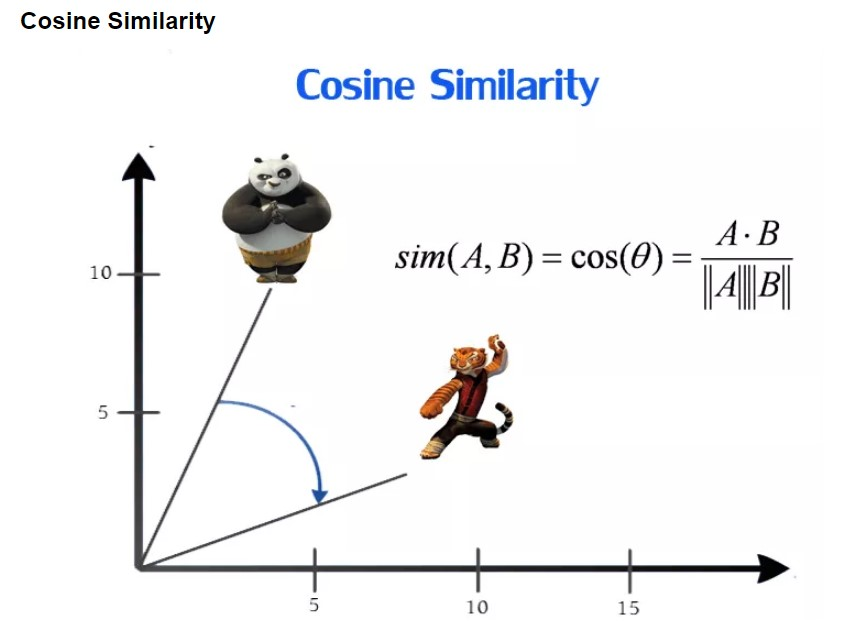